In [2]:
import pandas as pd 

df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print("Statistical summary: \n", df.describe())

Statistical summary: 
          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                 

In [5]:
print("Column types: \n", df.dtypes)

Column types: 
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent             

In [6]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]

if not null_columns.empty:
    print("Null values:\n", null_columns)
else:
    print("No null values found.")


Null values:
 children         4
country        488
agent        16340
company     112593
dtype: int64


In [7]:
null_percentage = df.isnull().mean() * 100
print("Percentage of null values:\n", null_percentage[null_percentage > 0])

## isnull() gives me a list of true/false for every column. True is 1 and false is 0. So the mean gives
## me for every column the trues/total n of the column 

## seeing the percentages I will drop the columns agent and company and drop the rows containing nulls
## from the other columns

Percentage of null values:
 children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [8]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 31994


In [9]:
duplicate_percentage = df.duplicated().mean() * 100
print("Percentage of duplicated rows:\n", duplicate_percentage[duplicate_percentage > 0])

## Almost a 27% of duplicates might seem a lot but in this case, they could be do to booking behaviour 
## likely frequent booking patterns

Percentage of duplicated rows:
 [26.79788927]


In [10]:

df["is_canceled"].value_counts(normalize=True)


is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

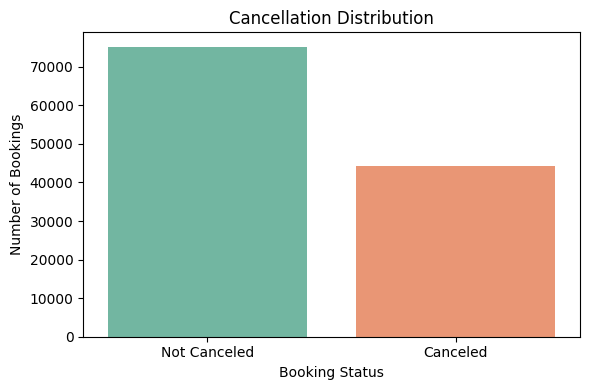

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


df['is_canceled_label'] = df['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

plt.figure(figsize=(6, 4))
sns.countplot(x="is_canceled_label", data=df, hue="is_canceled_label", palette="Set2", legend=False)
plt.title("Cancellation Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")


plt.tight_layout()
plt.show()


In [3]:
# Cancellation rate by deposit type
pivot = df.pivot_table(values="is_canceled", index="deposit_type", aggfunc="mean")
print(pivot)

pivot2 = df.pivot_table(values="is_canceled", index="lead_time", aggfunc="mean")
print(pivot2)



              is_canceled
deposit_type             
No Deposit       0.283770
Non Refund       0.993624
Refundable       0.222222
           is_canceled
lead_time             
0             0.067770
1             0.092775
2             0.102948
3             0.100220
4             0.102624
...                ...
622           1.000000
626           1.000000
629           1.000000
709           0.000000
737           0.000000

[479 rows x 1 columns]


In [ ]:
threshold = pivot2[pivot2["is_canceled"] == 1].index.min()
print(f"All bookings are canceled from lead_time = {threshold} days onward.")


All bookings are canceled from lead_time = 357 days onward.
                 is_canceled
lead_time_month             
0                   0.182459
1                   0.363404
2                   0.397375
3                   0.440382
4                   0.435967
5                   0.462025
6                   0.447258
7                   0.469215
8                   0.551453
9                   0.638236
10                  0.693484
11                  0.705587
12                  0.578732
13                  0.625000
14                  0.727444
15                  0.648410
16                  0.829268
17                  0.811475
18                  0.747253
19                  1.000000
20                  1.000000
23                  0.000000
24                  0.000000


In [ ]:
pivot_lead = df.pivot_table(
    values="is_canceled",
    index="lead_time",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
plt.plot(pivot_lead.index, pivot_lead["is_canceled"], color='teal', linewidth=2)
plt.title("Cancellation Rate vs Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## No real correlation?
## FInish graphics, comment them calculate correlations
## Find, train and deploy the model

NameError: name 'df' is not defined